In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import joblib
loaded_model = joblib.load('minst_XGboost.sav')

### Imporing and displaying the image

In [3]:
def predict_num(image):

    copy = image.copy()

    #thresholding
    thresh = cv2.adaptiveThreshold(copy, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY_INV, 199, 21)
    
    #padding]
    b = (thresh.shape[0]-thresh.shape[1])
    a = b//2
    constant= cv2.copyMakeBorder(thresh,a,a,b,b,cv2.BORDER_CONSTANT,value=[0])
    
    #Dileting
    kernel = np.ones((2,2),np.uint8)
    dilated = cv2.dilate(constant,kernel,iterations=10)

    
    resized = cv2.resize(dilated, (28,28), interpolation = cv2.INTER_AREA)

    #[rediction]
    img_arr = resized.flatten()
    im = img_arr.reshape(1,784)

    return loaded_model.predict(im)[0]

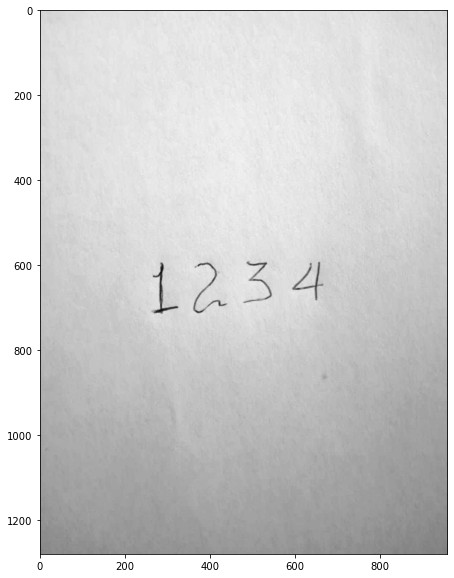

In [61]:
image = cv2.imread('img/test.jpg',0)
fig = plt.figure(figsize=(10,10))
plt.imshow(image,cmap='gray');

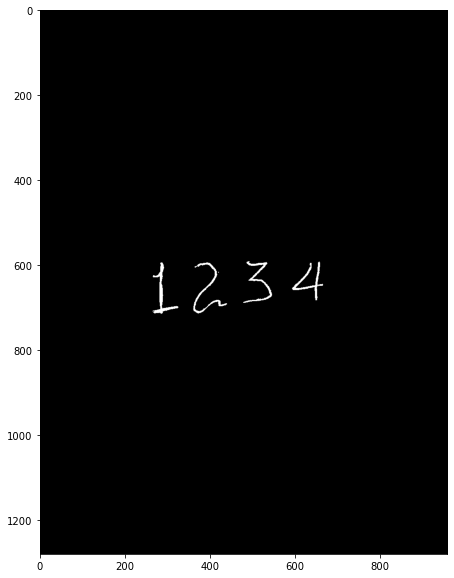

In [62]:
copy = image.copy()
thresh = cv2.adaptiveThreshold(copy, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY_INV, 199, 21)
fig = plt.figure(figsize=(10,10))
plt.imshow(thresh,cmap='gray');

In [63]:
cont, h = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cont,bound = sort_contours(cont)
j = 1
for i in cont:
    
    if len(i)>50:
        x,y,w,h = cv2.boundingRect(i)
        im = copy[y:y+h,x:x+w]
        cv2.imwrite('img/sequence/' + str(j) + '.jpg',im)
        print(predict_num(im))
        j +=1
        

8
2
3
2


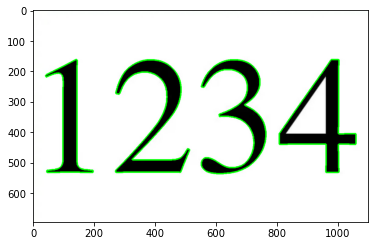

In [23]:
image2 = cv2.imread('img/test2.jpg')
cv2.drawContours(image2,cont,-1,(0,255.0),3)
cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
plt.imshow(image2)

In [610]:
def longest_contour(cnts):
    longest = 0
    for i in range(len(cnts)):
        if len(cnts[i]) > longest:
            longest = len(cnts[i])
            index = i
    return cnts[index]

In [7]:
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0

    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [8]:
def longest_contour(cnts):
    longest = 0
    for i in range(len(cnts)):
        if len(cnts[i]) > longest:
            longest = len(cnts[i])
            index = i
    return cnts[index]
